# Interlude on limit definition of $\exp$

To start out, let's understand the definition that is commonly given for $e$:
$$ e:= \lim_{x\to\infty} \left(1 + {1 \over x}\right)^x $$

It's probably better to think of this in terms of $e^x$, exponentiation. Consider:
$$ \exp(y) := \lim_{x\to\infty} \left(1 + {y \over x}\right)^x $$

The existence of this limit can be shown by [Bernoulli's inequality](https://en.wikipedia.org/wiki/Bernoulli%27s_inequality). Now note:

 1. $\exp(0)=1$
 2. $\exp(a\cdot b)=(\exp(a))^b$
 3. $\exp(a + b) = \exp(a) \cdot \exp(b)$
 4. ${d \over dx} \exp(x) = \exp(x)$
 
(1) follows immediately from the definition.

To show (2), we have:
 
\begin{aligned}
\exp(ab) & = \lim_{x\to\infty} \left(1 + {ab \over x}\right)^x \\
         & = \lim_{q\to\infty} \left(1 + {a \over q}\right)^{b\cdot q} \quad \left(\textrm{substitute } q=x/b\right) \\
         & = \left(\lim_{q\to\infty} \left(1 + {a \over q}\right)^q\right)^b \\
         & = \left(\exp(a)\right)^b \\
\end{aligned}

For (3):

\begin{aligned}
\exp(a+b) & = \lim_{x\to\infty} \left(1 + {a+b \over x}\right)^x \\
          & = \lim_{q\to\infty} \left(1 + {1 \over q}\right)^{q\cdot (a+b)} \quad \left(\textrm{substitute } q={x\over a+b}\right) \\
          & = \left(\lim_{q\to\infty} \left(1 + {1 \over q}\right)^q\right)^{a+b} \\
          & = \left(\exp(1)\right)^{a+b} \\
          & = \exp(1)^a\cdot \exp(1)^b \\
          & = \exp(a)\cdot \exp(b) \\
\end{aligned}

For (4), we have:

\begin{aligned}
{d \over dx} \exp(x) &= \lim_{\delta\to 0} \frac{\exp(x+\delta) - \exp(x)}{\delta} \\
                     &= \lim_{\delta\to 0} \frac{\exp(x)\exp(\delta) - \exp(x)}{\delta} \\
                     &= \exp(x)\left(\lim_{\delta\to 0} \frac{\exp(\delta) - 1}{\delta} \right) \\
                     &= \exp(x)\left(\lim_{\delta\to 0} \frac{\left(\lim_{y\to\infty}(1 + 1/y)^y\right)^\delta - 1}{\delta} \right) \\
                     &= \exp(x)\left(\lim_{\delta\to 0} \frac{\left((1 + \delta)^{1\over \delta}\right)^\delta - 1}{\delta} \right) \quad \left(\textrm{letting }y=1/\delta\right)\\
                     &= \exp(x)\left(\lim_{\delta\to 0} \frac{(1 + \delta) - 1}{\delta} \right) \\
                     &= \exp(x)\left(\lim_{\delta\to 0} \frac{\delta}{\delta} \right)\\
                     &= \exp(x) \\
\end{aligned}

# Poisson (as a limit of Binomial)

Note: follows [this post](https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239).

As a motivating example, consider the number of customers to a grocery store in a town, where every person in the town has probability $p$ of going to the store during a particular hour.  Suppose there are 40,000 people in the town, and they each have a 1/1,000 chance of going to the store during that hour.

The PMF for this looks like:

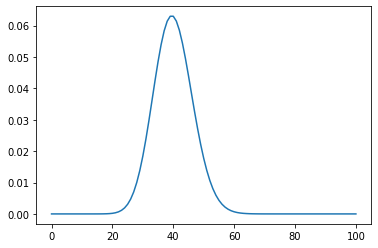

In [11]:
import scipy.stats, numpy as np
n = 100
xs = np.linspace(0, n, n + 1)
ys = scipy.stats.binom.pmf(xs, 40_000, 1 / 1_000)

import matplotlib.pyplot as plt

plt.plot(xs, ys)
plt.show()


Now suppose we have $n$ binomial trials in a given time period, but we do not know $n$ or the parameter $p$. We only know the expected number of successes during that time period, $\lambda$. (In the example above, we don't know how many people shop at this store, nor how likely they are to do so at 6-7pm on a Saturday.) But note that whatever $n$ and $p$ are, we have:
$$\lambda = np$$
Or, equivalently:
$$ p = {\lambda \over n} $$

Then since this is a binomial trial, we have:
$$ P(X=k) = {n \choose k} \left({\lambda \over n}\right)^k \left(1 - {\lambda \over n}\right)^{n-k}  = {n! \over k!(n-k)!} \left({\lambda \over n}\right)^k \left(1 - {\lambda \over n}\right)^{n-k} $$

Taking the limit as $n\to\infty$:

\begin{aligned}
P_\infty(X=k) &= {\lambda^k \over k!} \cdot \lim_{n\to\infty} {n! \over (n-k)!} \left({1 \over n}\right)^k \left(1 - {\lambda \over n}\right)^{n-k} \\
              &= {\lambda^k \over k!} \cdot \lim_{n\to\infty} {n! \over n^k(n-k)!}  \left(1 - {\lambda \over n}\right)^n\left(1 - {\lambda \over n}\right)^{-k} \\
              & \textrm{Canceling like terms, we end up with }k\textrm{ terms of size }O(n)\textrm{ on top and bottom, so the first term is 1. Thus:} \\
              &= {\lambda^k \over k!} \cdot \lim_{n\to\infty} \left(1 - {\lambda \over n}\right)^n\left(1 - {\lambda \over n}\right)^{-k} \\
              & \textrm{Since }k\textrm{ is fixed. The second term is 1:} \\
              &= {\lambda^k \over k!} \cdot \lim_{n\to\infty} \left(1 - {\lambda \over n}\right)^n \\
              &= {\lambda^k e^{-\lambda} \over k!} \\
\end{aligned}
That is the standard PMF of the Poisson distribution. In our example above, we have $\lambda=40$:

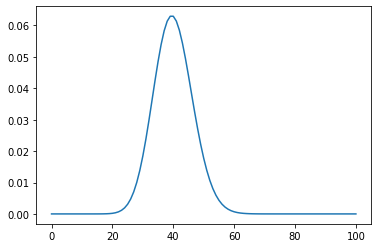

In [19]:
import scipy.stats, numpy as np, scipy.special
bound = 100
λ = 40
xs = np.linspace(0, bound, bound + 1)
ys = np.power(λ, xs) * np.exp(-λ) / scipy.special.factorial(xs)

import matplotlib.pyplot as plt

plt.plot(xs, ys)
plt.show()
